<a href="https://colab.research.google.com/github/pedddrym/ML_housing_prices/blob/main/HousingPricesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

In [76]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Housing.csv" # -> This is how the file is named in kaggle

# Load the latest version
housingprices = kagglehub.dataset_load(
  adapter=KaggleDatasetAdapter.PANDAS,
  handle="yasserh/housing-prices-dataset",
  path=file_path,
)

print("First 5 records:")
housingprices.head()

First 5 records:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Housing Price
A simple Machine Learning project aiming to create a prediction model using Sickit-Learn's Linear Regression.


In [77]:
# Identifying the target variable
housingprices.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [78]:
# Creating a copy of the main dataset so we don't mess it
df = housingprices.copy()
housingprices.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


**By the name of the dataset and based on the columns presented, it is clear that our target variable is "price".**

In [79]:
# Informing the unit if the one has it
df = df.rename(columns={'price':'price (dols)', 'area':'area (m2)'})
df.columns

Index(['price (dols)', 'area (m2)', 'bedrooms', 'bathrooms', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [80]:
# Checking info about each atribute, missing data count and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price (dols)      545 non-null    int64 
 1   area (m2)         545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### As can be seen, the dataset does not have missing values, furthermore, the missing values restoration treatment is not needed


## That being said, let us take a look at each atribute x target graph and see if we can find a good relation just by looking at it

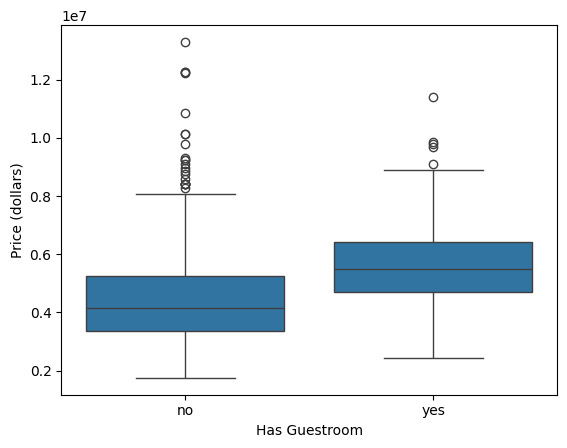

In [100]:
sns.boxplot(x='guestroom',y='price (dols)',data=df)
plt.xlabel('Has Guestroom')
plt.ylabel('Price (dollars)')
plt.show()

### The boxplots for the house price based on the presence of a guestroom are a bit apart, we can see that there is a portion of their values that are at the same height -- meaning that there is a certain relation between these two.

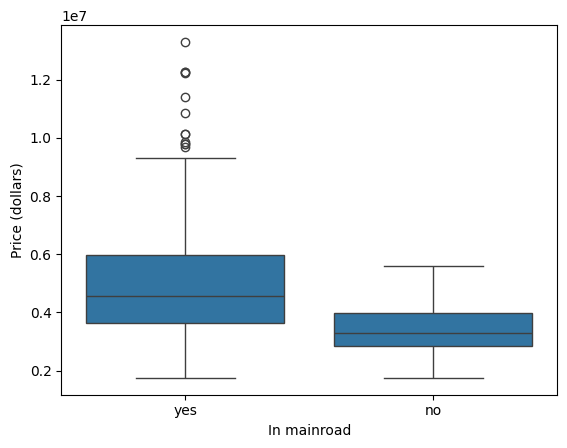

In [101]:
sns.boxplot(x='mainroad',y='price (dols)',data=df)
plt.xlabel('In mainroad')
plt.ylabel('Price (dollars)')
plt.show()

### There's a relation between the house being at the mainroad and its price -- not only are most of the houses at the mainroad -- but their price tend to go down if they're not.

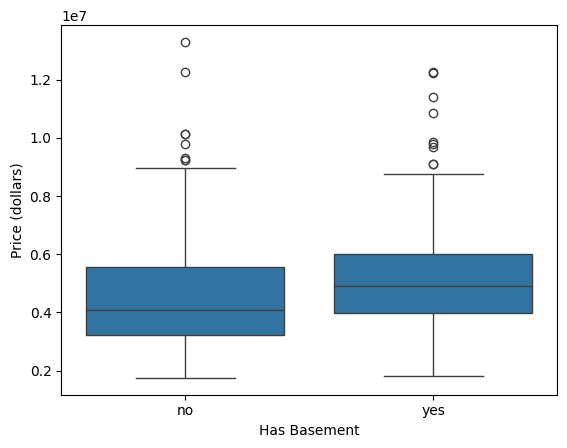

In [102]:
sns.boxplot(x='basement',y='price (dols)',data=df)
plt.xlabel('Has Basement')
plt.ylabel('Price (dollars)')
plt.show()

### Here we fall at a similar version of the boxplot regarding the guestroom, only this one is at a bad spot, since most observations from both values are at the same height -- there is a relation, but it's not good.

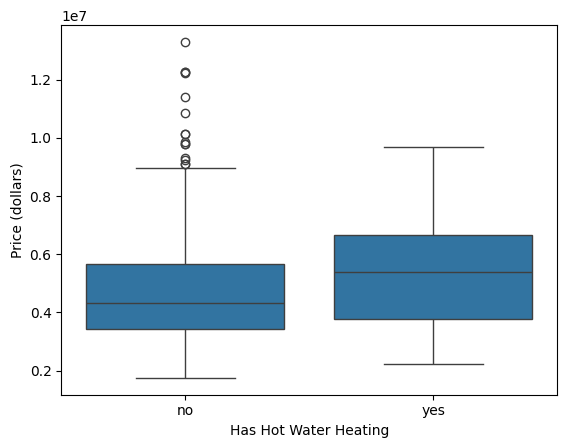

In [103]:
sns.boxplot(x='hotwaterheating',y='price (dols)',data=df)
plt.xlabel('Has Hot Water Heating')
plt.ylabel('Price (dollars)')
plt.show()

# Same situation.

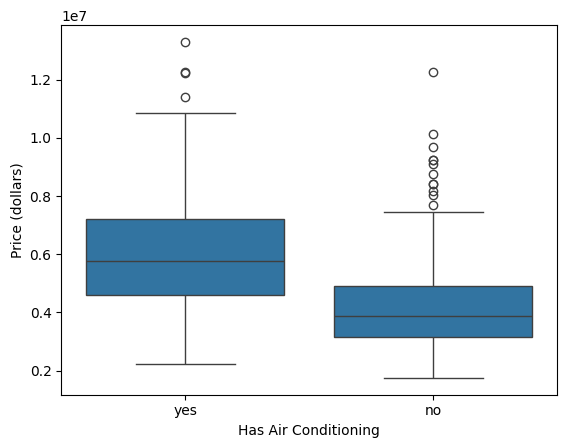

In [104]:
sns.boxplot(x='airconditioning',y='price (dols)',data=df)
plt.xlabel('Has Air Conditioning')
plt.ylabel('Price (dollars)')
plt.show()

### Woah! Now we're talking! Seems like we found a variable that makes quite the difference on the housing price! We can see that, even if there's values at the same height, they're just a few, and their medians are far apart from each other -- showing that, yes, there is a good relation between the presence of Air-Conditioner in the house and its price!

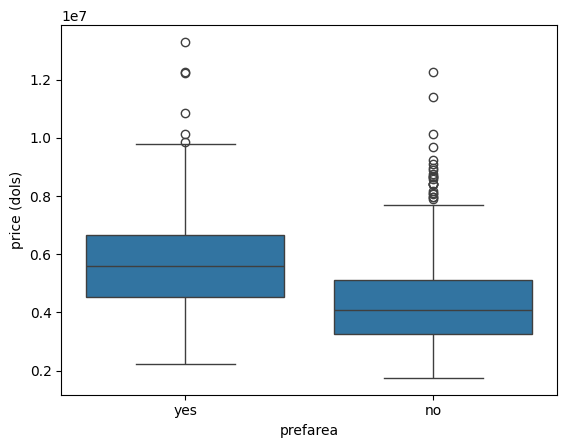

In [86]:
# Kaggle doesn't inform what this variable is about, so I'll guess it
sns.boxplot(x='prefarea',y='price (dols)',data=df)
plt.xlabel('In preferred area')
plt.ylabel('Price (dollars)')
plt.show()

### This one recalls the mainroad boxplot, there is about a third of each box at the same height, but their medians are quite apart, perhaps this mean good stuff, we'll see.

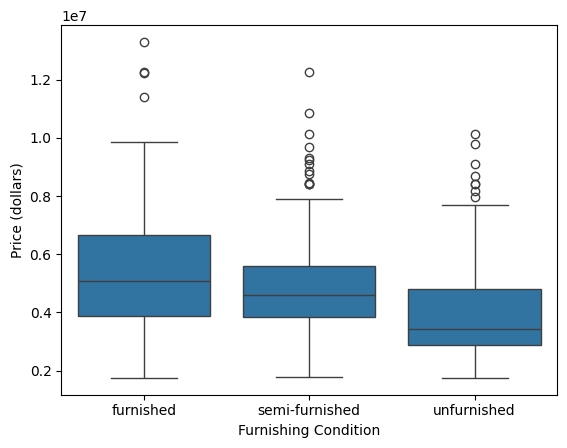

In [105]:
sns.boxplot(x='furnishingstatus',y='price (dols)',data=df)
plt.xlabel('Furnishing Condition')
plt.ylabel('Price (dollars)')
plt.show()

### For this one, unfortunately, there is few relation -- the best we got here is the distance from each furnished status' median and unfurnished's. Still, not as impactful as the air-conditioning one, for example.

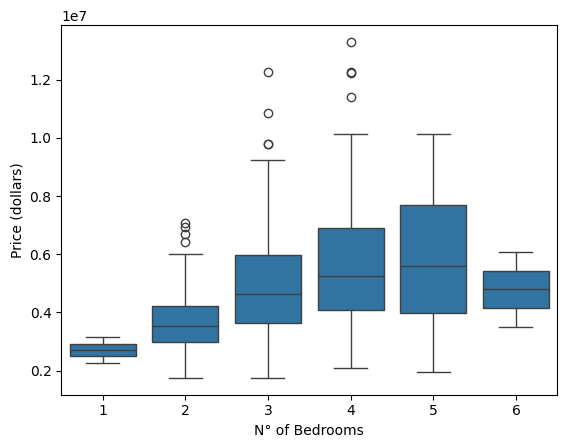

In [106]:
sns.boxplot(x='bedrooms',y='price (dols)',data=df)
plt.xlabel('N° of Bedrooms')
plt.ylabel('Price (dollars)')
plt.show()

### This one's also got a visible relation, where the price tag tends to go up depending on the amount of bedrooms the house has and, incredibly, with 6, the price goes down!

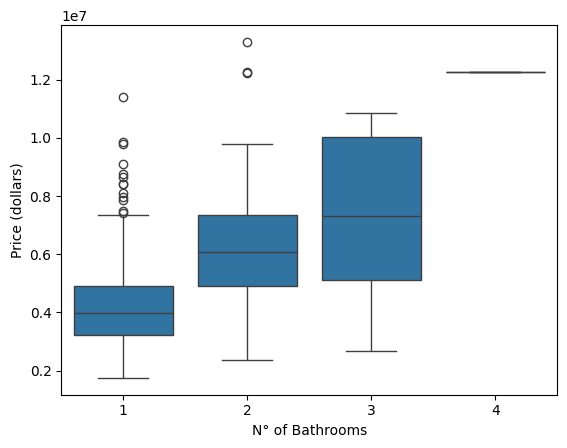

In [108]:
sns.boxplot(x='bathrooms',y='price (dols)',data=df)
plt.xlabel('N° of Bathrooms')
plt.ylabel('Price (dollars)')
plt.show()

### Another case of a visible relation!

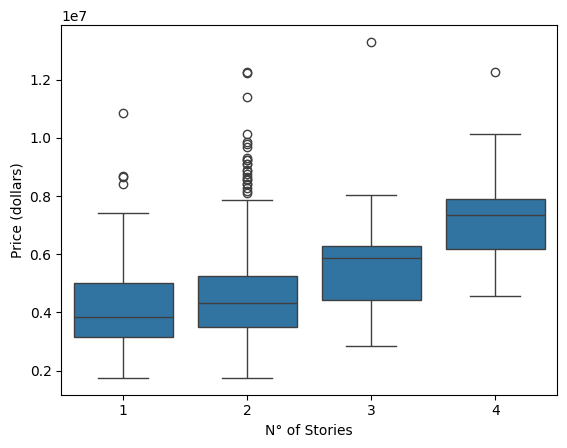

In [109]:
sns.boxplot(x='stories',y='price (dols)',data=df)
plt.xlabel('N° of Stories')
plt.ylabel('Price (dollars)')
plt.show()

### This one's got that bedroom's boxplot feeling, the more you have it, the pricier it becomes, only the first two values don't show a good relation as the rest does.

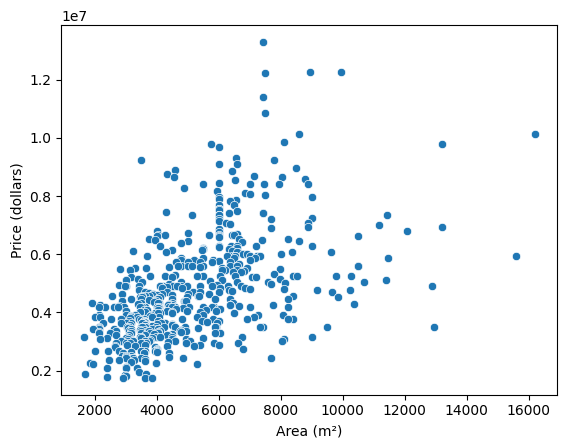

In [110]:
sns.scatterplot(x='area (m2)',y='price (dols)',data=df)
plt.xlabel('Area (m²)')
plt.ylabel('Price (dollars)')
plt.show()

### There seems to be quite the relation here, the more area one has, the more pricier it becomes, although the values get kinda crazy afterwards.

In [92]:
# Calculating the average, median and mode of different groups
display(df[['bedrooms','stories']].groupby('stories').mean(), df[['bedrooms','stories']].groupby('stories').median())

,bedrooms
stories,
1,2.519824
2,3.281513
3,3.230769
4,3.341463


,bedrooms
stories,
1,2.0
2,3.0
3,3.0
4,3.0


In [93]:
display(df[['bathrooms','stories']].groupby('stories').mean(), df[['bathrooms','stories']].groupby('stories').median())

,bathrooms
stories,
1,1.136564
2,1.331933
3,1.358974
4,1.780488


,bathrooms
stories,
1,1.0
2,1.0
3,1.0
4,2.0


In [111]:
# Encoding the categorical features
housing = df.copy()
housing['airconditioning'] = housing['airconditioning'].map({'yes':1,'no':0})
housing['mainroad'] = housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1,'no':0})
housing['basement'] = housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1,'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1,'no':0})
housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

In [112]:
# Separating the qualitative variables from the quantitative
target = housing['price (dols)']
cat_df = housing[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]
num_df = housing[['area (m2)','bedrooms','bathrooms','stories','parking']]

In [114]:
# Calculating the correlation between the quantitatives with the target variable
corr_results = []
for variable in num_df.columns:
  correlation = num_df[variable].corr(target)
  corr_results.append((variable, correlation*100))

corr_table = pd.DataFrame(corr_results, columns=['Variable', 'Correlation'])
corr_table = corr_table.sort_values(by='Correlation', ascending=False)
corr_table

,Variable,Correlation
0,area (m2),53.599735
2,bathrooms,51.754534
3,stories,42.071237
4,parking,38.439365
1,bedrooms,36.649403


In [115]:
# Calculating the chi-square of the qualitative variables with the target
chi2_results = []
for variable in cat_df.columns:
  contingency_table = pd.crosstab(cat_df[variable], target)
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  total_observations = housing[variable].count()
  contingency_coefficient = chi2 / (chi2 + total_observations)
  chi2_results.append((variable, contingency_coefficient*100))

chi2_table = pd.DataFrame(chi2_results, columns=['Variable', 'Qui²_Coef.-Conting.'])
chi2_table = chi2_table.sort_values(by='Qui²_Coef.-Conting.', ascending=False)
chi2_table

,Variable,Qui²_Coef.-Conting.
6,furnishingstatus,48.296595
1,guestroom,35.678131
5,prefarea,34.940176
4,airconditioning,34.785247
2,basement,32.685347
0,mainroad,30.885113
3,hotwaterheating,30.145498


In [116]:
# Table with all relations in order
all_var = corr_results + chi2_results
all_var = pd.DataFrame(all_var, columns=['Variable', 'Coefficient'])
all_var = all_var.sort_values(by='Coefficient', ascending=False)
all_var

,Variable,Coefficient
0,area (m2),53.599735
2,bathrooms,51.754534
11,furnishingstatus,48.296595
3,stories,42.071237
4,parking,38.439365
1,bedrooms,36.649403
6,guestroom,35.678131
10,prefarea,34.940176
9,airconditioning,34.785247
7,basement,32.685347


/tmp/ipython-input-117-3691048680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=all_var, palette='viridis')


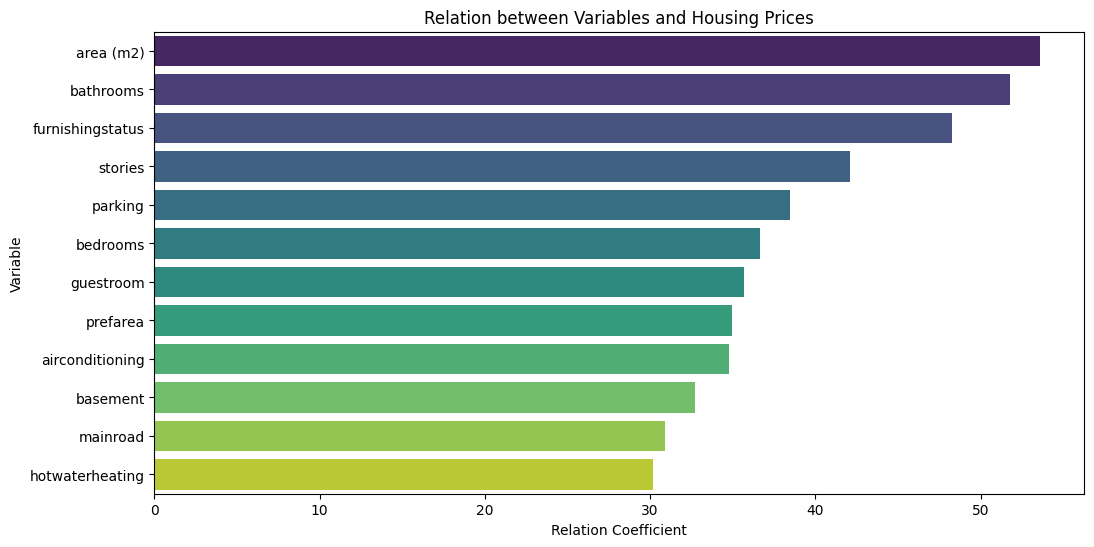

In [117]:
# Showing the table in graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Variable', data=all_var, palette='viridis')
plt.title('Relation between Variables and Housing Prices')
plt.xlabel('Relation Coefficient')
plt.ylabel('Variable')
plt.show()

### We can see that all features have a relation above 30% with the target variable, but that means more operational cost

### Let's apply the Linear Regression to the most important features and then with all of them and compare their performance

In [121]:
# Only with the srongest features
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

top_features = all_var.loc[all_var['Coefficient'] > 35, 'Variable'].tolist()

X = housing[top_features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_strong = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_strong}")
rmse_strong = mse_strong**0.5
print(f"Root Mean Squared Error: {rmse_strong}")

Mean Squared Error: 2171360794386.1855
Root Mean Squared Error: 1473553.7975880574


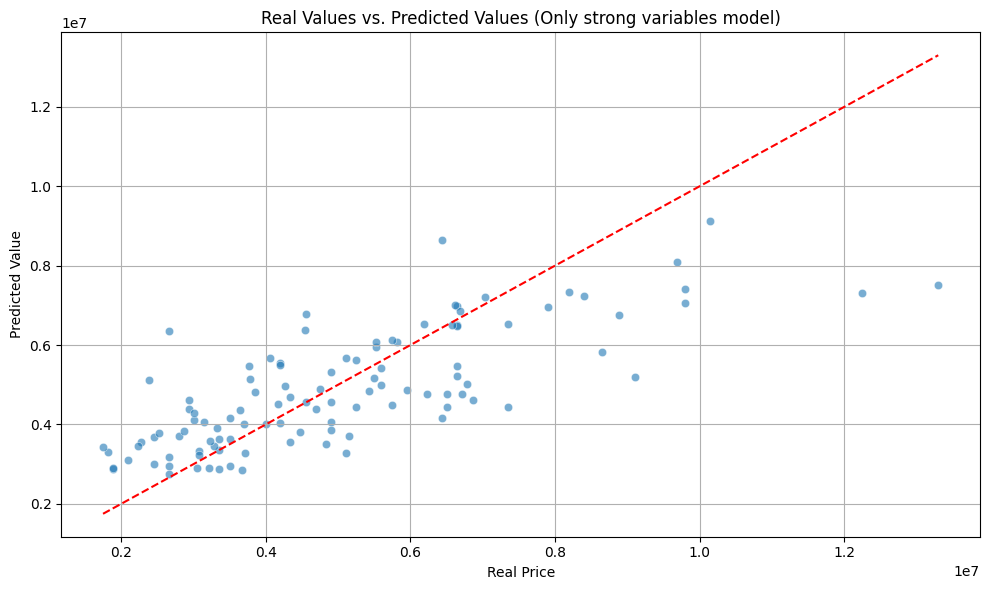

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Line of reference: y = x (predicted = real)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Titles and tags
plt.title('Real Values vs. Predicted Values (Only strong variables model)')
plt.xlabel('Real Price')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [123]:
# With all variables
X = housing.drop(columns=['price (dols)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_all}")
rmse_all = mse_all**0.5
print(f"Root Mean Squared Error: {rmse_all}")

Mean Squared Error: 1771751116594.0352
Root Mean Squared Error: 1331071.4167895108


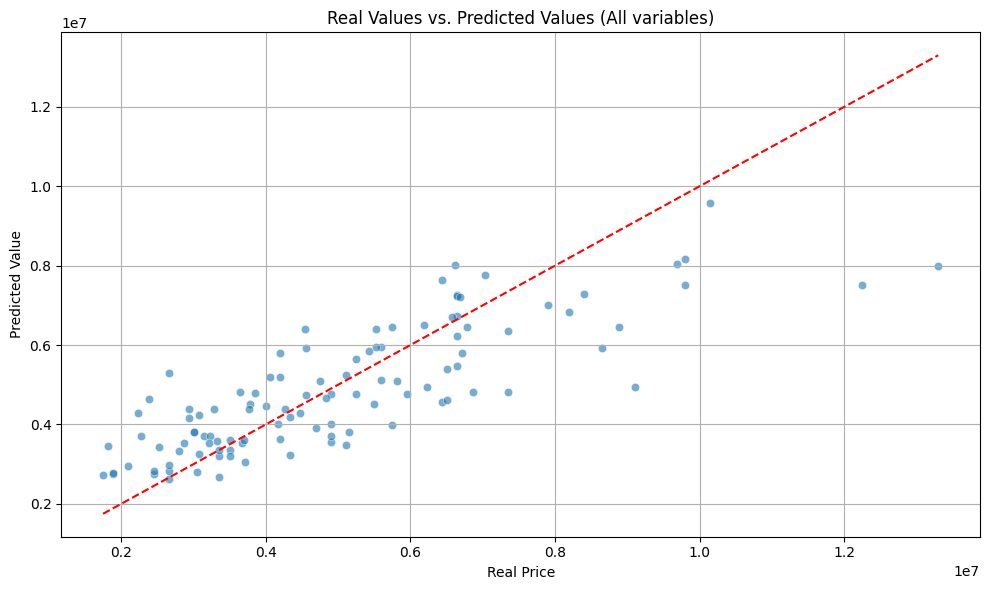

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Line of reference: y = x (predicted = real)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Titles and tags
plt.title('Real Values vs. Predicted Values (All variables)')
plt.xlabel('Real Price')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
# Upgrade:
upgrade_mse = (mse_all - mse_strong) / mse_all
upgrade_rmse = (rmse_all - rmse_strong) / rmse_all

print(f"MSE upgrade: {upgrade_mse*100:.2f}%")
print(f"RMSE upgrade: {upgrade_rmse*100:.2f}%")

MSE upgrade: -22.55%
RMSE upgrade: -10.70%


# More like a downgrade tho 😭